## Trend Calculation [Argentina]


#### Importing the Relevant Libraries

In [102]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install openpyxl


In [103]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
import openpyxl

#### Cleaning the Data 

In [104]:
# Import the Data from the xlsx file
os.chdir(r"C:\Users\Andre Hee\EC2B1-Coursework")
filename = r"pwt100.xlsx"  

# Load the "Data" sheet and filter for Argentina
df = pd.read_excel(filename, sheet_name="Data", engine="openpyxl")
filtered_df = df[df.iloc[:, 1] == "Argentina"].copy()  # Make an explicit copy

# Index Match the Header
legend_df = pd.read_excel(filename, sheet_name="Legend", engine="openpyxl")
mapping = dict(zip(legend_df.iloc[:, 0].str.strip(), legend_df.iloc[:, 1].str.strip()))  # Clean mapping keys
filtered_df = filtered_df.rename(columns=lambda col: mapping[col] if col in mapping else col)

# Clean to numeric and datetime format
filtered_df.iloc[:, 4:] = filtered_df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')  # Ensure numeric data
filtered_df['Year'] = pd.to_datetime(filtered_df['Year'], format='%Y', errors='coerce')


##### (i) Real GDP

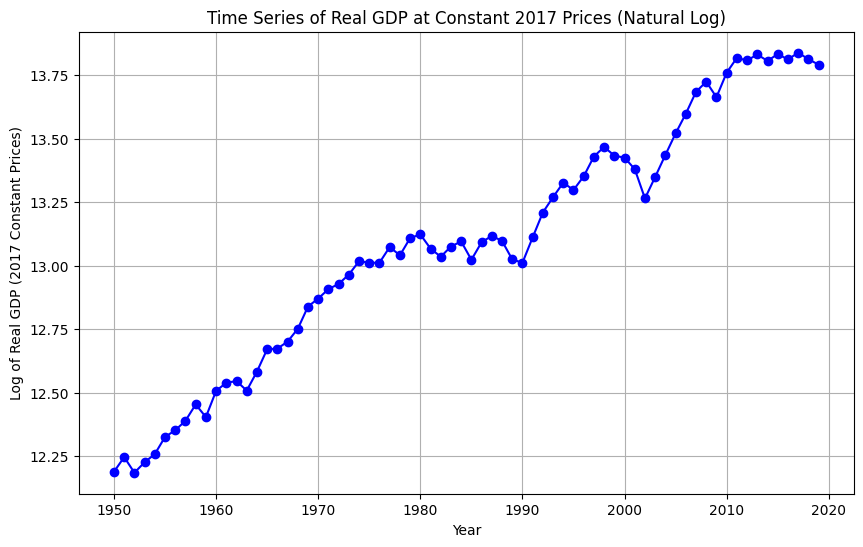

In [105]:
# Check if 'filtered_df' exists in the environment
if 'filtered_df' not in locals():
    raise ValueError("filtered_df is not defined. Please run the first tranche of the code first.")

# Filtering for Real GDP column and converting to natural log scale
gdp_column = "Real GDP at constant 2017 national prices (in mil. 2017US$)"
log_gdp_column = "Log Real GDP"

# Apply the natural log only if the column is not already transformed
if gdp_column in filtered_df.columns and log_gdp_column not in filtered_df.columns:
    filtered_df[log_gdp_column] = [
        np.log(x) if pd.notnull(x) and x > 0 else np.nan for x in filtered_df[gdp_column]
    ]
else:
    print(f"'{log_gdp_column}' already exists. Skipping log transformation.")

# Plot the time series graph
plt.figure(figsize=(10, 6)) 
plt.plot(filtered_df['Year'], filtered_df[log_gdp_column], color='blue', linestyle='-', marker='o')
plt.xlabel('Year')
plt.ylabel('Log of Real GDP (2017 Constant Prices)')
plt.title('Time Series of Real GDP at Constant 2017 Prices (Natural Log)')
plt.grid(True)  
plt.show()


##### (ii) Real GDP per Capita

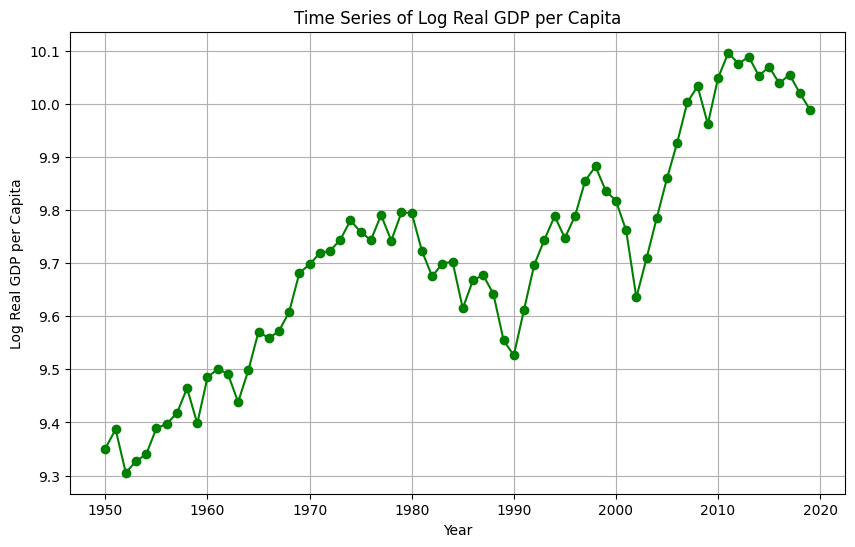

In [106]:
# Columns for Real GDP and Population
gdp_column = "Real GDP at constant 2017 national prices (in mil. 2017US$)"
population_column = "Population (in millions)"
gdp_per_capita_column = "Log Real GDP per capita"

# Calculate Real GDP per capita and take the natural log
if all(col in filtered_df.columns for col in [gdp_column, population_column]):
    filtered_df[gdp_per_capita_column] = [
        np.log(gdp / pop) if pd.notnull(gdp) and pd.notnull(pop) and pop > 0 else np.nan
        for gdp, pop in zip(filtered_df[gdp_column], filtered_df[population_column])
    ]
else:
    raise KeyError(f"Columns '{gdp_column}' or '{population_column}' not found in DataFrame.")

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Year'], filtered_df[gdp_per_capita_column], color='green', linestyle='-', marker='o')
plt.xlabel('Year')
plt.ylabel('Log Real GDP per Capita')
plt.title('Time Series of Log Real GDP per Capita')
plt.grid(True)
plt.show()
